In [ ]:
from zipfile import ZipFile
file_name = '/content/Indian Premier League.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# Import Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset import

In [ ]:
ipl_ball = pd.read_csv('/content/deliveries.csv') 
ipl_match = pd.read_csv('/content/matches.csv')

In [ ]:
ipl_ball.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [ ]:
ipl_match.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
ipl_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
ipl_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
print(ipl_match.shape)
print(ipl_ball.shape)

(756, 18)
(179078, 21)


In [ ]:
ipl_match.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
ipl_ball.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
ipl_match['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
ipl_match['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

# Total Number of Teams Played per season

Text(0, 0.5, 'Number of Team')

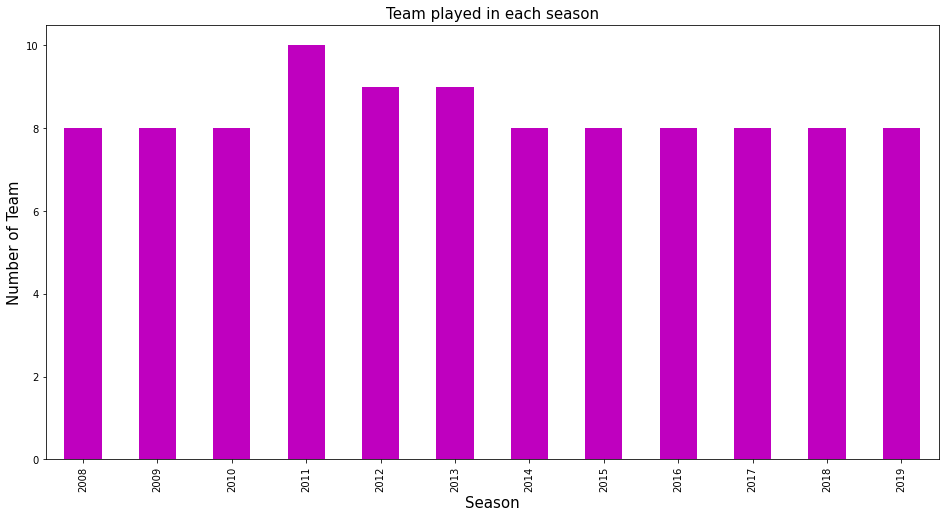

In [ ]:
plt.figure(figsize=(16,8))
ipl_match.groupby('season')['team1'].nunique().plot(kind='bar', color='m')
plt.title('Team played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of Team', fontsize=15)

# Total Number of Matches Played per season

In [ ]:
tot_match_season = ipl_match.groupby(['season'])['id'].count().reset_index().rename(columns={'id':'matches'})
tot_match_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of matches')

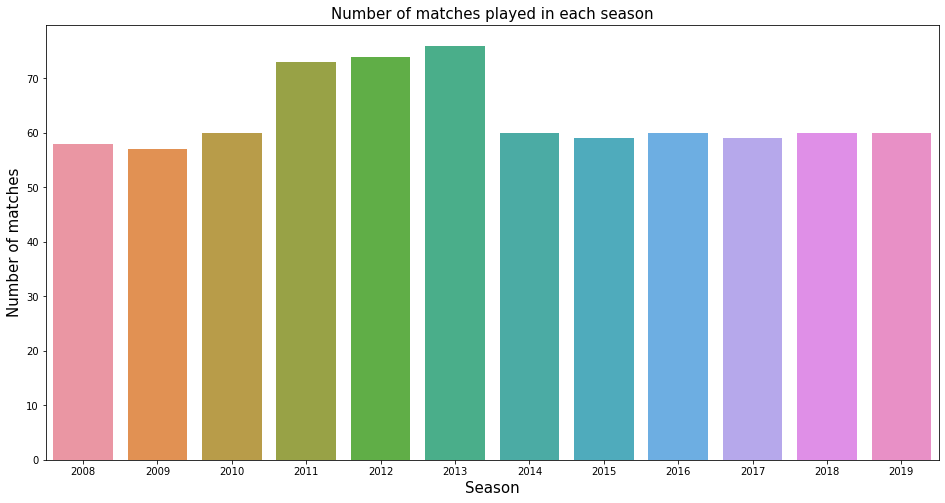

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(ipl_match['season'])
plt.title('Number of matches played in each season', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of matches', fontsize=15)

# Make a collective database

In [ ]:
#merging the 2 datasets
ipl_data = pd.merge(ipl_ball, ipl_match, left_on='match_id', right_on='id')
ipl_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
ipl_data.shape


(179078, 39)

# Total runs in each season

In [ ]:
tot_season_runs = ipl_data.groupby(['season'])['total_runs'].sum().reset_index()
tot_season_runs

,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

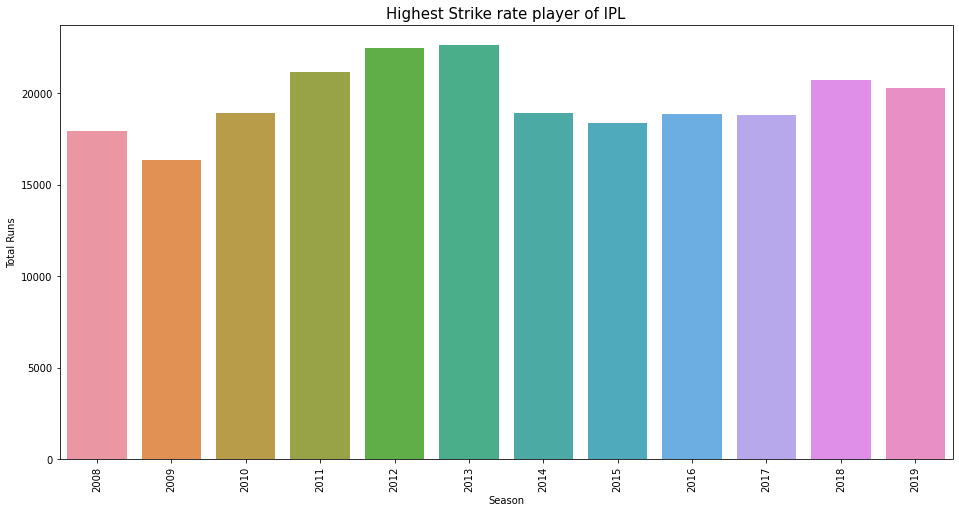

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='season', y='total_runs', data=tot_season_runs)
plt.title('Highest Strike rate player of IPL', fontsize=15)
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)

# Matches played in stadiums

Text(0, 0.5, 'Number of Team')

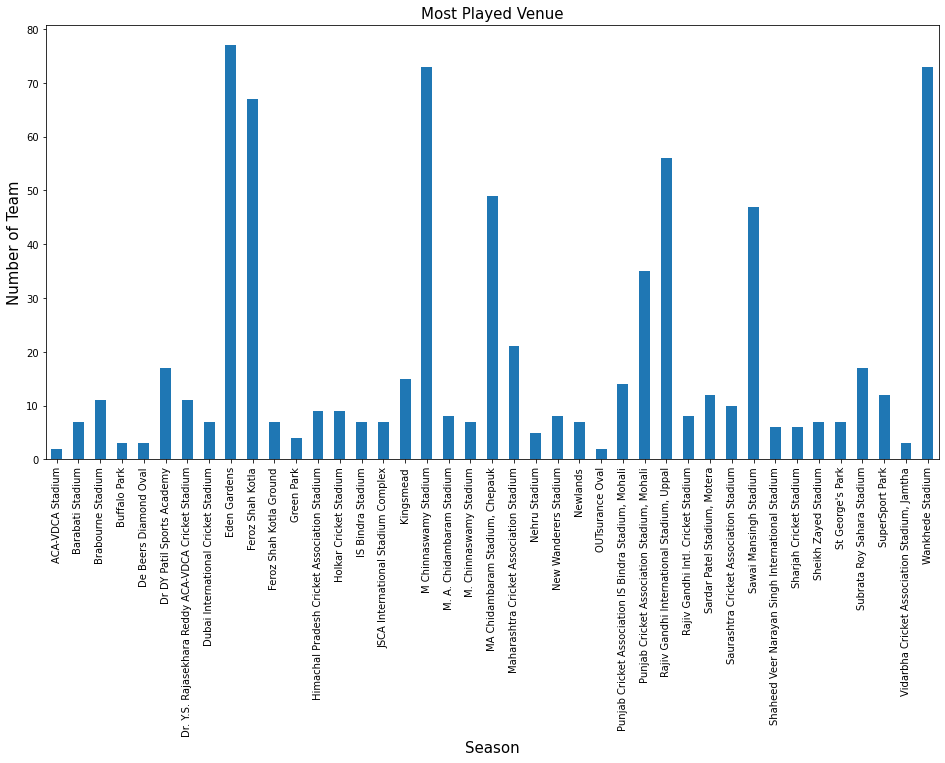

In [ ]:
plt.figure(figsize=(16,8))
ipl_data.groupby('venue')['id'].nunique().plot(kind='bar')
plt.title('Most Played Venue', fontsize=15)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Number of Team', fontsize=15)

# Total Wins by teams

In [ ]:
tot_winner = ipl_match.groupby(['winner'])['id'].count().reset_index().rename(columns={'id':'matches'})
tot_winner

,winner,matches
0,Chennai Super Kings,100
1,Deccan Chargers,29
2,Delhi Capitals,10
3,Delhi Daredevils,67
4,Gujarat Lions,13
5,Kings XI Punjab,82
6,Kochi Tuskers Kerala,6
7,Kolkata Knight Riders,92
8,Mumbai Indians,109
9,Pune Warriors,12


Text(0, 0.5, 'Number of Wins')

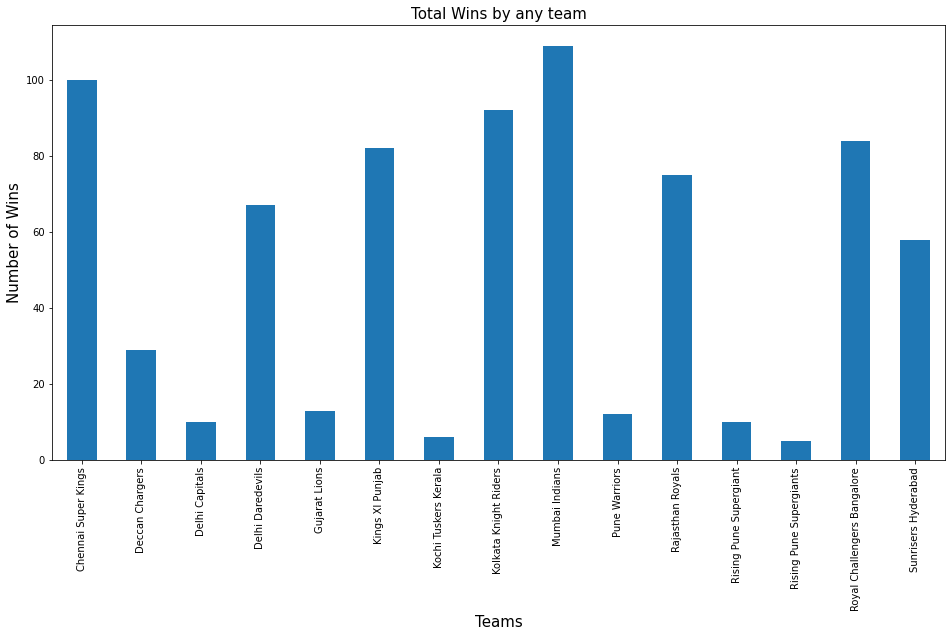

In [ ]:
plt.figure(figsize=(16,8))
ipl_match.groupby('winner')['id'].count().plot(kind='bar')
plt.title('Total Wins by any team', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.ylabel('Number of Wins', fontsize=15)

# Decision Taken after Winning toss

Text(0.5, 1.0, 'Decision taken after winning toss')

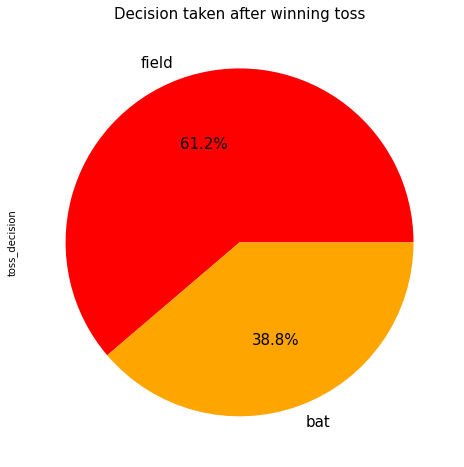

In [ ]:
plt.figure(figsize=(16,8))
ipl_match['toss_decision'].value_counts().plot(kind='pie', colors=['r','orange'],autopct = '%1.1f%%', fontsize=15)
plt.title('Decision taken after winning toss', fontsize=15)

# Total Toss Win Match Min Data

Text(0, 0.5, 'Frequency')

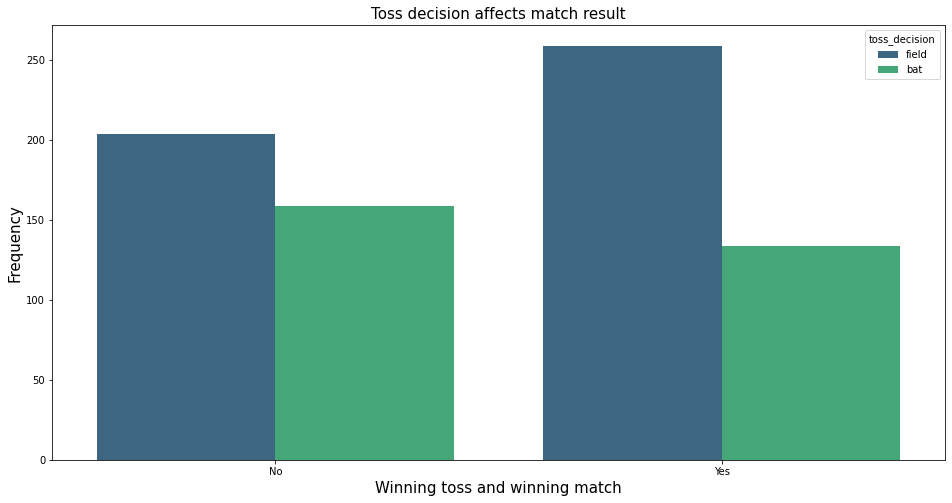

In [ ]:
ipl_match['tosswin_matchwin'] = np.where((ipl_match.toss_winner == ipl_match.winner), 'Yes','No')

plt.figure(figsize=(16,8))
sns.countplot(x='tosswin_matchwin',data = ipl_match, hue='toss_decision', palette='viridis')
plt.title('Toss decision affects match result', fontsize=15)
plt.xlabel('Winning toss and winning match', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

# Team Decision After Winning Toss

Text(0, 0.5, 'Frequency')

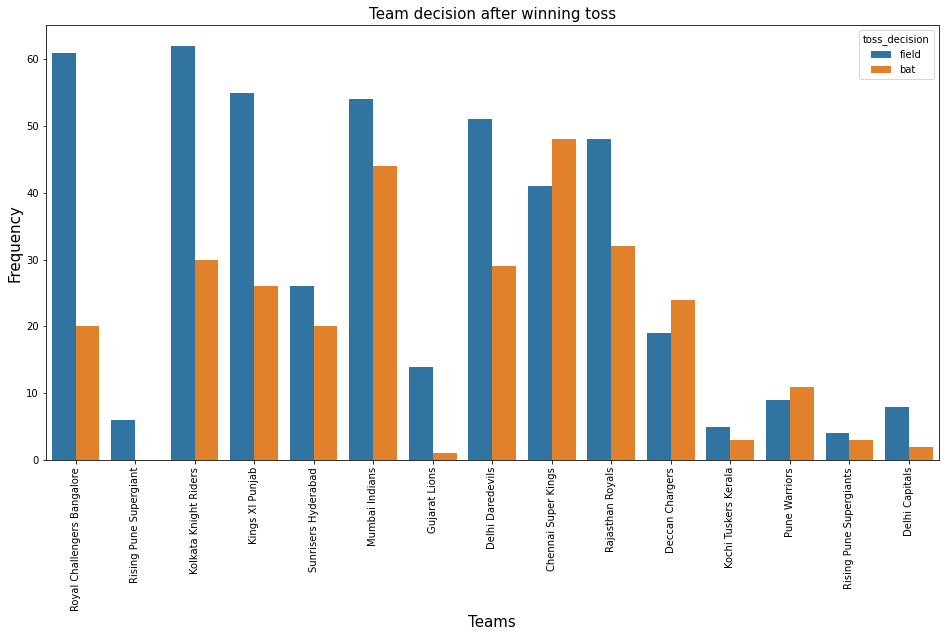

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='toss_winner',data = ipl_match, hue='toss_decision')
plt.title('Team decision after winning toss', fontsize=15)
plt.xlabel('Teams', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15)

# Most Man Of The Match Won

Text(0, 0.5, 'Frequency')

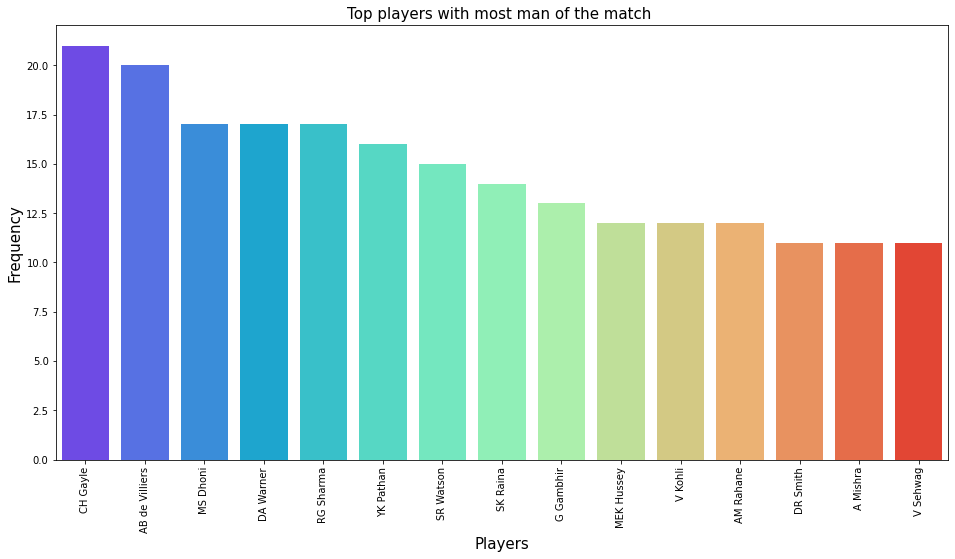

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data = ipl_match,order=ipl_match['player_of_match'].value_counts().head(15).index , palette='rainbow')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=15)

# Top Run Getters of Ipl

In [ ]:
ipl_data.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

Text(0, 0.5, 'Total runs scored')

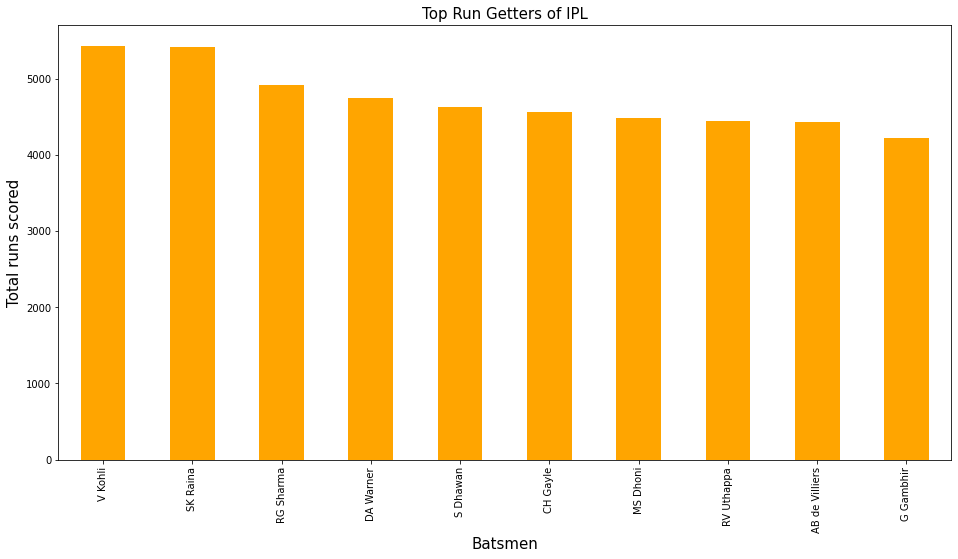

In [ ]:
ipl_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8), color='orange')
plt.title('Top Run Getters of IPL', fontsize=15)
plt.xlabel('Batsmen', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total runs scored', fontsize=15)

# Most Consistent Players in Ipl

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


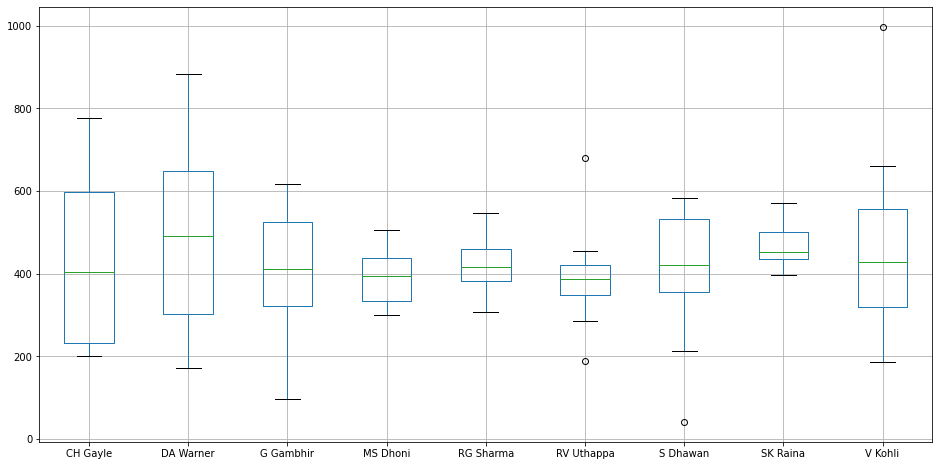

In [ ]:
constant_batsman = ipl_data[ipl_data.batsman.isin(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan','CH Gayle','MS Dhoni',
                                         'RV Uthappa', 'AB de Villers', 'G Gambhir'])]

constant_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind='box', figsize=(16,8), grid='-')

# Top Wicket taker in Ipl

Text(0, 0.5, 'Total Wicket Taken')

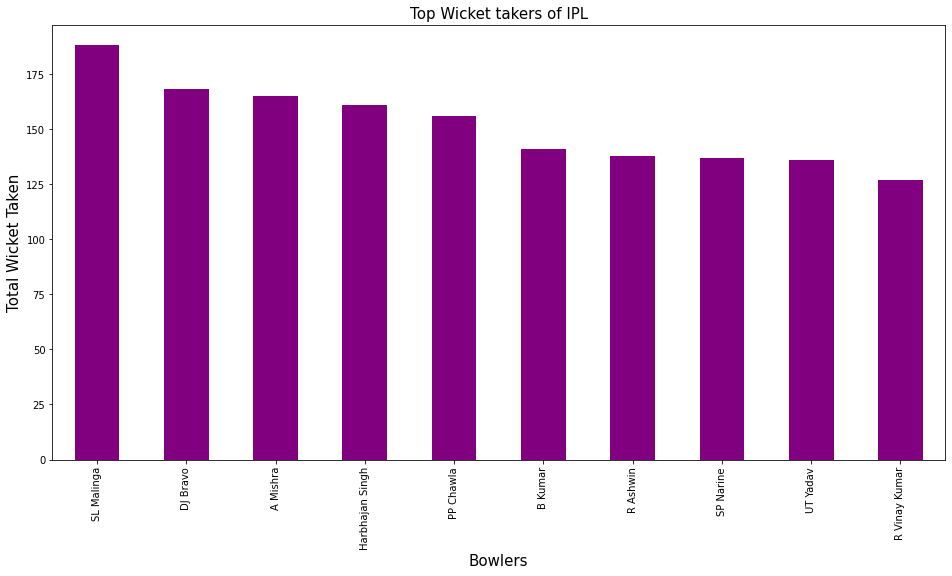

In [ ]:
ipl_data.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(16,8), color='purple')
plt.title('Top Wicket takers of IPL', fontsize=15)
plt.xlabel('Bowlers', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Total Wicket Taken', fontsize=15)

# Most Dismissal Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


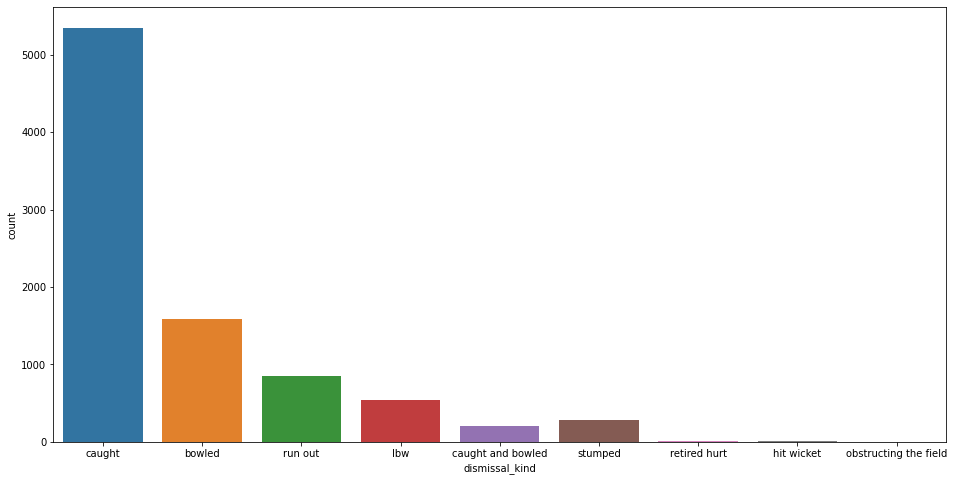

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(ipl_data['dismissal_kind'])
plt.show()

# Highest Strike rate of players in Ipl

In [ ]:
no_of_balls = pd.DataFrame(ipl_data.groupby('batsman')['ball'].count())
no_of_balls 

,ball
batsman,
A Ashish Reddy,196
A Chandila,7
A Chopra,75
A Choudhary,20
A Dananjaya,5
...,...
YV Takawale,183
Yashpal Singh,67
Younis Khan,7


In [ ]:
runs = pd.DataFrame(ipl_data.groupby('batsman')['batsman_runs'].sum())
runs

,batsman_runs
batsman,
A Ashish Reddy,280
A Chandila,4
A Chopra,53
A Choudhary,25
A Dananjaya,4
...,...
YV Takawale,192
Yashpal Singh,47
Younis Khan,3


In [ ]:
seasons = pd.DataFrame(ipl_data.groupby('batsman')['season'].nunique())
seasons 

,season
batsman,
A Ashish Reddy,4
A Chandila,2
A Chopra,2
A Choudhary,1
A Dananjaya,1
...,...
YV Takawale,3
Yashpal Singh,1
Younis Khan,1


In [ ]:
strike_rate = pd.DataFrame({'balls':no_of_balls['ball'], 'run':runs['batsman_runs'], 'season':seasons['season']})
strike_rate.reset_index(inplace = True)
strike_rate

,batsman,balls,run,season
0,A Ashish Reddy,196,280,4
1,A Chandila,7,4,2
2,A Chopra,75,53,2
3,A Choudhary,20,25,1
4,A Dananjaya,5,4,1
...,...,...,...,...
511,YV Takawale,183,192,3
512,Yashpal Singh,67,47,1
513,Younis Khan,7,3,1
514,Yuvraj Singh,2207,2765,11


In [ ]:
strike_rate['strike_rate'] = (strike_rate['run']/strike_rate['balls'])*100
highest_strike_rate = strike_rate[strike_rate.season.isin([9,10,11])][['season','batsman','strike_rate']].sort_values(by='strike_rate',ascending = False)
highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
188,9,JA Morkel,136.938202
134,9,DR Smith,132.279534
426,9,SE Marsh,130.109775
72,11,BB McCullum,127.332746
38,9,AJ Finch,127.113703
449,10,STR Binny,126.000000


Text(0, 0.5, 'Strike Rate')

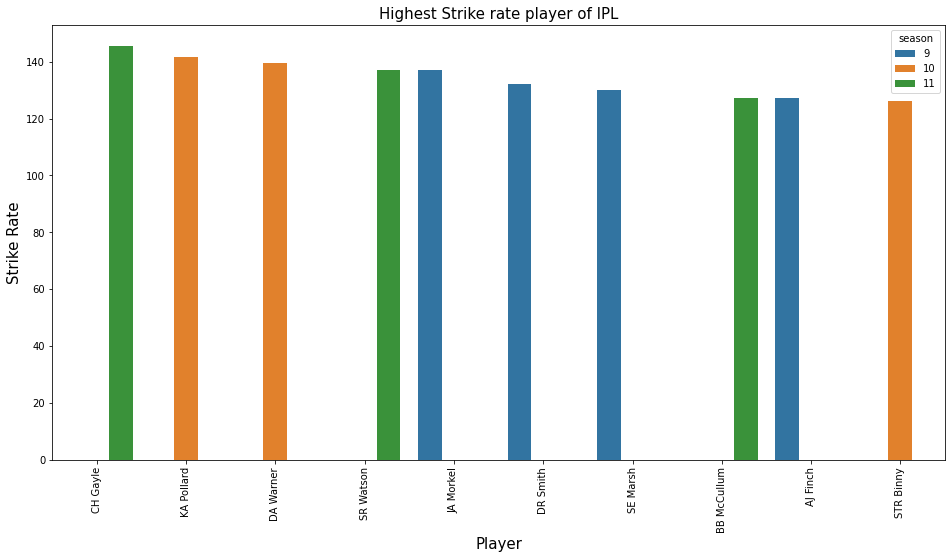

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='batsman', y='strike_rate', data=highest_strike_rate.head(10), hue='season')
plt.title('Highest Strike rate player of IPL', fontsize=15)
plt.xlabel('Player', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Strike Rate', fontsize=15)